In [51]:
!pip install matplotlib seaborn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import os

# Specify the directory to search
directory = '/kaggle/input'  # Adjust this path as needed

for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [53]:
import pandas as pd

# Corrected path using double backslashes
df = pd.read_csv("D:\\train.csv")

# Alternatively, using a raw string literal
df = pd.read_csv(r"D:\train.csv")

In [54]:
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [55]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [56]:
data = df.dropna()
df=data
df.shape

(699, 2)

In [57]:
#traning data spliting input and output
train_input = np.array(df.x[0:500]).reshape(500,1)
train_output = np.array(df.y[0:500]).reshape(500,1)

#validation data input and output
test_input = np.array(df.x[500:]).reshape(199,1)
test_output = np.array(df.y[500:]).reshape(199,1)

In [58]:
# shape of output and input
print(f'shape of train input {train_input.shape}')
print(f'shape of train output {train_output.shape}')
print(f'shape of test input {test_input.shape}')
print(f'shape of test output {test_output.shape}')

shape of train input (500, 1)
shape of train output (500, 1)
shape of test input (199, 1)
shape of test output (199, 1)


In [59]:
#forword propgagation
# f(x) = mx+c

def forward_propagation(train_input,parameters):
    
    m = parameters["m"]
    c = parameters["c"]
    
    predictions = np.multiply(m,train_input)+c
    
    return predictions

In [60]:
def cost_function(predictions,train_output):
    
    cost = np.mean((train_output-predictions)**2)*0.5
    
    return cost

In [61]:
def backword_propagtion(train_input,train_output,predictions):
    
    derivatives = dict()
    
    df = predictions-train_input
    
    dm = np.mean(np.multiply(df,train_input))
    
    dc = np.mean(df)
    
    derivatives["dm"] =dm
    derivatives["dc"] =dc
    
    return derivatives

In [62]:
def update_parameters(parameters,derivatives,learning_rate):
    
    parameters["m"]=parameters["m"]-learning_rate*derivatives["dm"]
    parameters["c"]=parameters["c"]-learning_rate*derivatives["dc"]
    
    return parameters

In [63]:
def train(train_input,train_output,learning_rate,iters):
    #random parameters
    
    parameters = dict()
    
    parameters["m"]=np.random.uniform(0,1)
    parameters["c"]=np.random.uniform(0,1)
    
    #loss
    
    loss=[]
    plt.figure
    
    #iters
    for x in range(iters):
        
        #forward propagation
        predictions =forward_propagation(train_input,parameters)
        
        #cost function
        cost = cost_function(predictions,train_output)
        loss.append(cost)
        print(f'itertion = {x+1}, loss = {cost}')
        
        #plot
        fig,ax=plt.subplots()
        
        ax.plot(train_input,train_output,'+',label="orignal")
        ax.plot(train_input,predictions,'*',label="training")
        
        legend=ax.legend()
        plt.plot(train_input,train_output,'+',label="orignal")
        plt.plot(train_input,predictions,'*',label="training")
        plt.show()
        
        #backword propogation
        derivatives = backword_propagtion(train_input,train_output,predictions)
        
        #update parameters

        parameters = update_parameters(parameters,derivatives,learning_rate)
        
    return parameters,loss
        

itertion = 1, loss = 1254.9952160232008


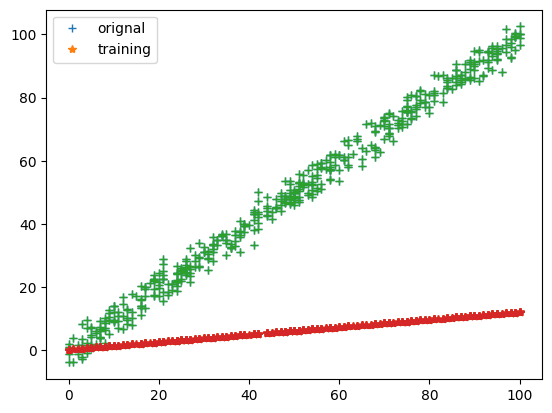

itertion = 2, loss = 569.9258370964741


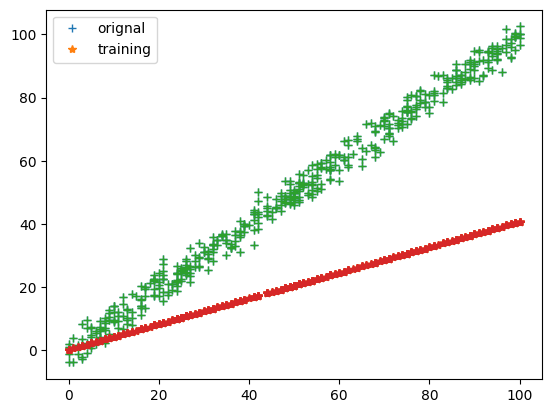

itertion = 3, loss = 259.6386818530185


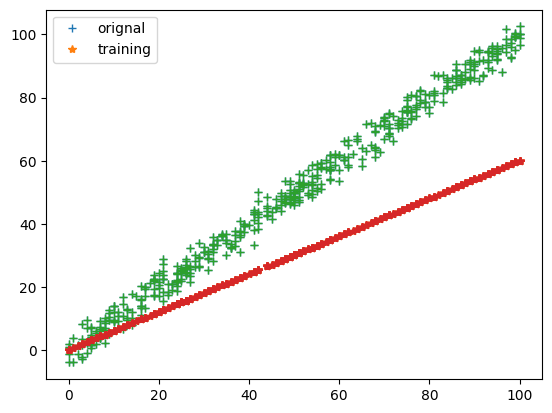

itertion = 4, loss = 119.21776725458746


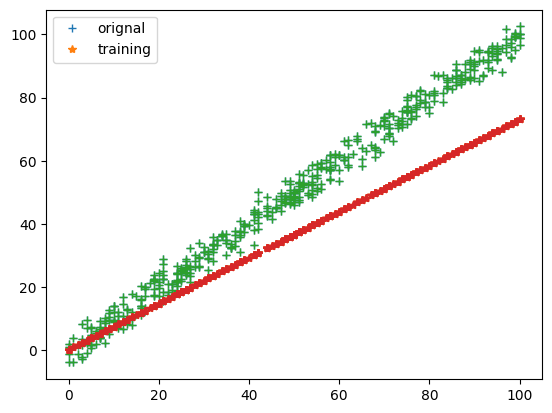

itertion = 5, loss = 55.74891398443267


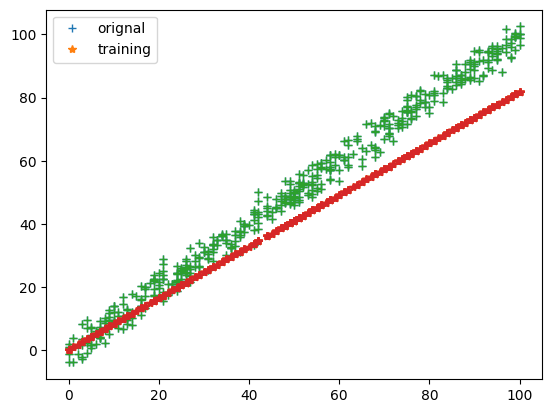

itertion = 6, loss = 27.114865152131884


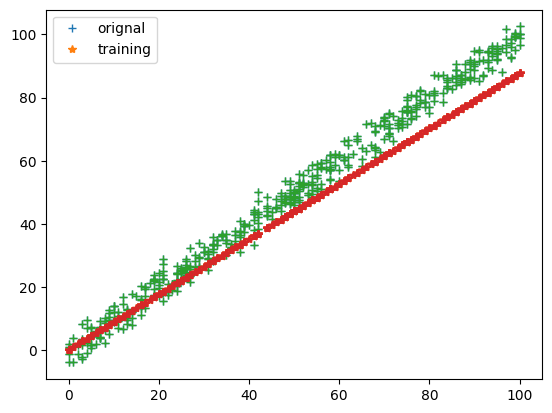

itertion = 7, loss = 14.232576628581727


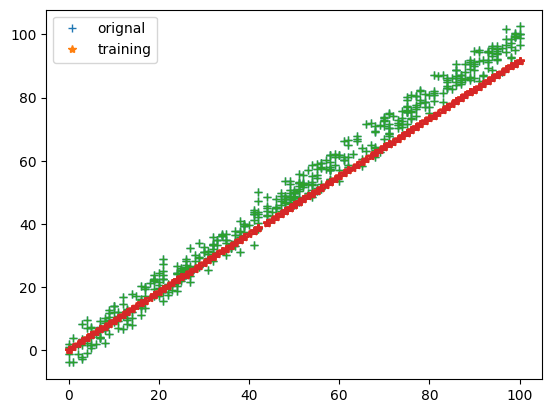

itertion = 8, loss = 8.461294962835108


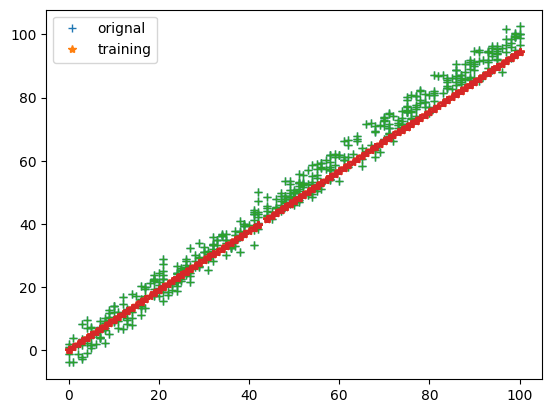

itertion = 9, loss = 5.892316386800914


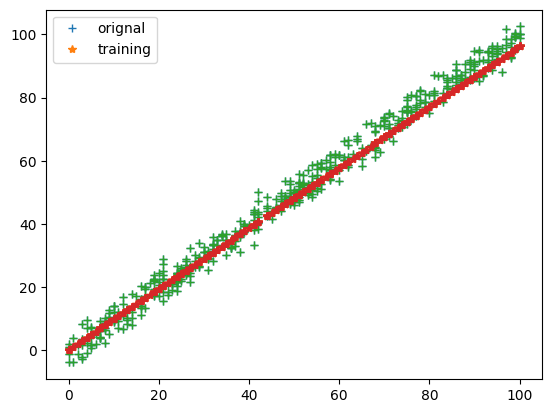

itertion = 10, loss = 4.760081659761037


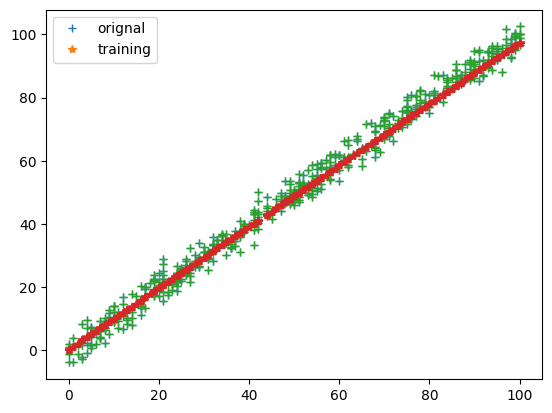

itertion = 11, loss = 4.268824628898458


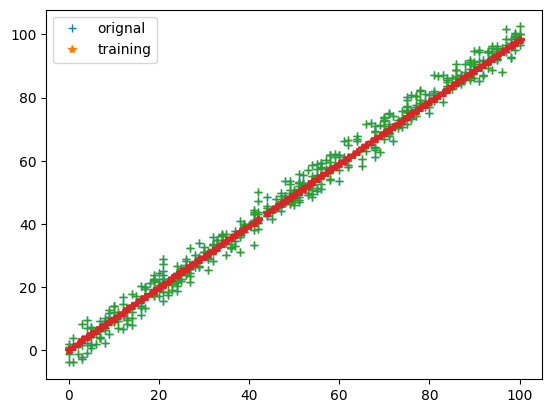

itertion = 12, loss = 4.06105506141736


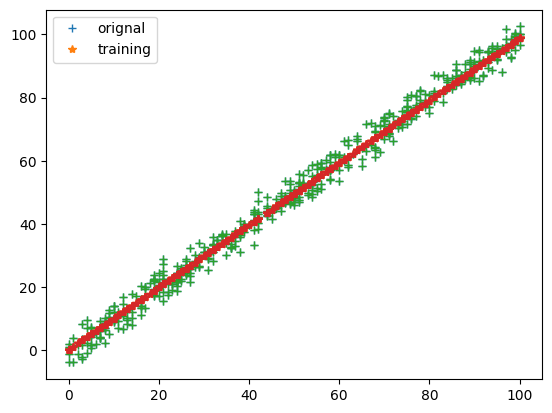

itertion = 13, loss = 3.9769702613131597


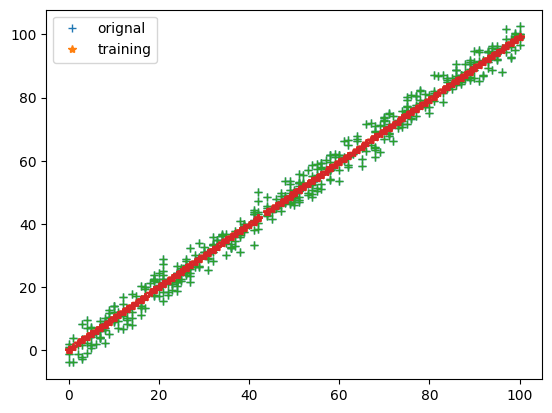

itertion = 14, loss = 3.945678094891653


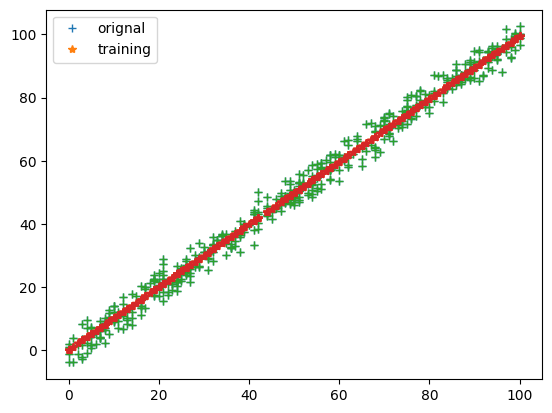

itertion = 15, loss = 3.9360995303534962


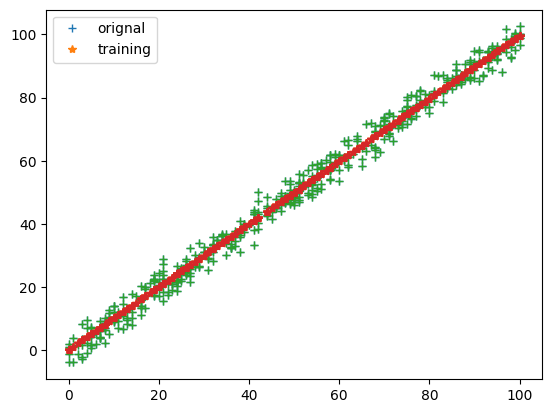

({'m': 0.9945669689085895, 'c': 0.20422684417648584},
 [1254.9952160232008,
  569.9258370964741,
  259.6386818530185,
  119.21776725458746,
  55.74891398443267,
  27.114865152131884,
  14.232576628581727,
  8.461294962835108,
  5.892316386800914,
  4.760081659761037,
  4.268824628898458,
  4.06105506141736,
  3.9769702613131597,
  3.945678094891653,
  3.9360995303534962])

In [70]:
train(train_input,train_output,0.0001,15)
